In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('population.csv')

In [4]:
df.columns=['year','Population', 'Population growth',  'Births attended by skilled health staff']
df.dropna(how="all", inplace=True)
df.tail()

,year,Population,Population growth,Births attended by skilled health staff
53,2013,316204908,0.700262,99.2
54,2014,318563456,0.743124,98.5
55,2015,320896618,0.729732,0.0
56,2016,323127513,0.692801,0.0
57,2017,0,0.000000,0.0


In [5]:
X = df.ix[:,0:3].values
y = df.ix[:,3].values

/Users/sherry/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [37]:
# here we define x and y for the values

In [6]:
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

In [7]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [45]:
#How we make Covariance matrix（）

In [8]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.01754386  0.64169838 -0.64081235]
 [ 0.64169838  1.01754386 -0.089734  ]
 [-0.64081235 -0.089734    1.01754386]]


In [9]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.01754386  0.64169838 -0.64081235]
 [ 0.64169838  1.01754386 -0.089734  ]
 [-0.64081235 -0.089734    1.01754386]]


In [10]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ -6.89414980e-01  -7.24366596e-01   1.39449270e-04]
 [ -5.12497404e-01   4.87904779e-01   7.06608334e-01]
 [  5.11911511e-01  -4.87074903e-01   7.07604864e-01]]

Eigenvalues 
[ 1.97039227  0.15442935  0.92780995]


In [ ]:
#Eigenvectors represent how the data change 

In [11]:
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ -6.89414980e-01  -7.24366596e-01   1.39449270e-04]
 [ -5.12497404e-01   4.87904779e-01   7.06608334e-01]
 [  5.11911511e-01  -4.87074903e-01   7.07604864e-01]]

Eigenvalues 
[ 1.93641999  0.15176678  0.91181323]


In [12]:
u,s,v = np.linalg.svd(X_std.T)
u

array([[ -6.89414980e-01,   1.39449270e-04,  -7.24366596e-01],
       [ -5.12497404e-01,   7.06608334e-01,   4.87904779e-01],
       [  5.11911511e-01,   7.07604864e-01,  -4.87074903e-01]])

In [46]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('prepared')

prepared


In [14]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.9364199935
0.911813228458
0.151766778039


In [16]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), 
                      eig_pairs[1][1].reshape(3,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ -6.89414980e-01   1.39449270e-04]
 [ -5.12497404e-01   7.06608334e-01]
 [  5.11911511e-01   7.07604864e-01]]


In [17]:
Y = X_std.dot(matrix_w)

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=2)
Y_pca = pca.fit_transform(X_std)

In [27]:
dfcolor = pd.DataFrame([['item1','red'],['item2','blue'],['item3','yellow']],columns=['Population',  'Births attended by skilled health staff'])
mergeddf = pd.merge(df,dfcolor)

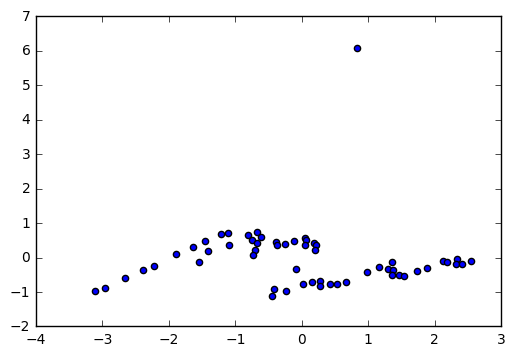

In [47]:
import matplotlib.pyplot as plt
plt.scatter(Y_pca[:,0],Y_pca[:,1])
plt.show()

In [49]:
n_components= pd.DataFrame(pca.components_, columns=['Population', 'Population growth',  'Births attended by skilled health staff'])

In [50]:
n_components

,Population,Population growth,Births attended by skilled health staff
0,0.689415,0.512497,-0.511912
1,-0.000139,-0.706608,-0.707605


In [53]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.heatmap(n_components)

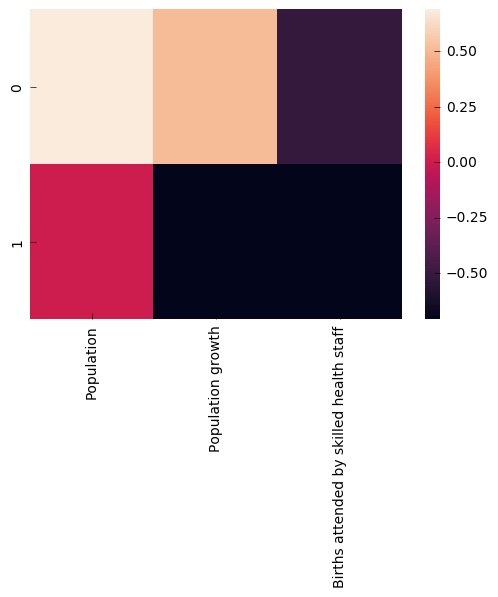

In [54]:
plt.show()